# Multi-Control-X

The multi-control-X applies X gate to one target qubit bit only if the logical AND of all control qubits is satisfied.
The multi-control-X function incorporates numerous implementations for the multi-control-X gate,
each with a different depth and number of auxiliary qubits.
These implementations generically outperform the Gray-code, V-chain and recursive implementations of Ref. [[1]](#1),
as well as the relative-phase Toffoli implementation of Ref. [[2]](#2).
Given a sufficient number of auxiliary qubits, some implementations allow for logarithmic depth and linear CX-count.
The synthesis process selects the appropriate implementation depending on the defined constraints.

Operator: `control`

Arguments:

- `ctrl: Union[QBit, QArray[QBit]]`
- `stmt_block: QCallable`
  

Operator `control` takes a qubit array of length one or more as `ctrl`, and applies the `stmt_block` operand if all qubits are in the `1` state 


## Example

The following example shows how to use the `control` operator to implement a Multi-Control-X with 5 control qubits and 1 target qubit 

In [8]:
from classiq import *


@qfunc
def main(cntrl: Output[QArray[QBit]], target: Output[QBit]) -> None:
    allocate(5, cntrl)
    allocate(1, target)
    hadamard_transform(cntrl)
    control(ctrl=cntrl, stmt_block=lambda: X(target))

In [9]:
qmod = create_model(main)

### Minimized Depth

In [10]:
qmod_min_depth = set_constraints(
    qmod, Constraints(optimization_parameter="depth")
)

qprog = synthesize(qmod_min_depth)
show(qprog)

Opening: https://platform.classiq.io/circuit/eaaabd5b-e040-4604-ac55-b0fcc5eb0324?version=0.62.0


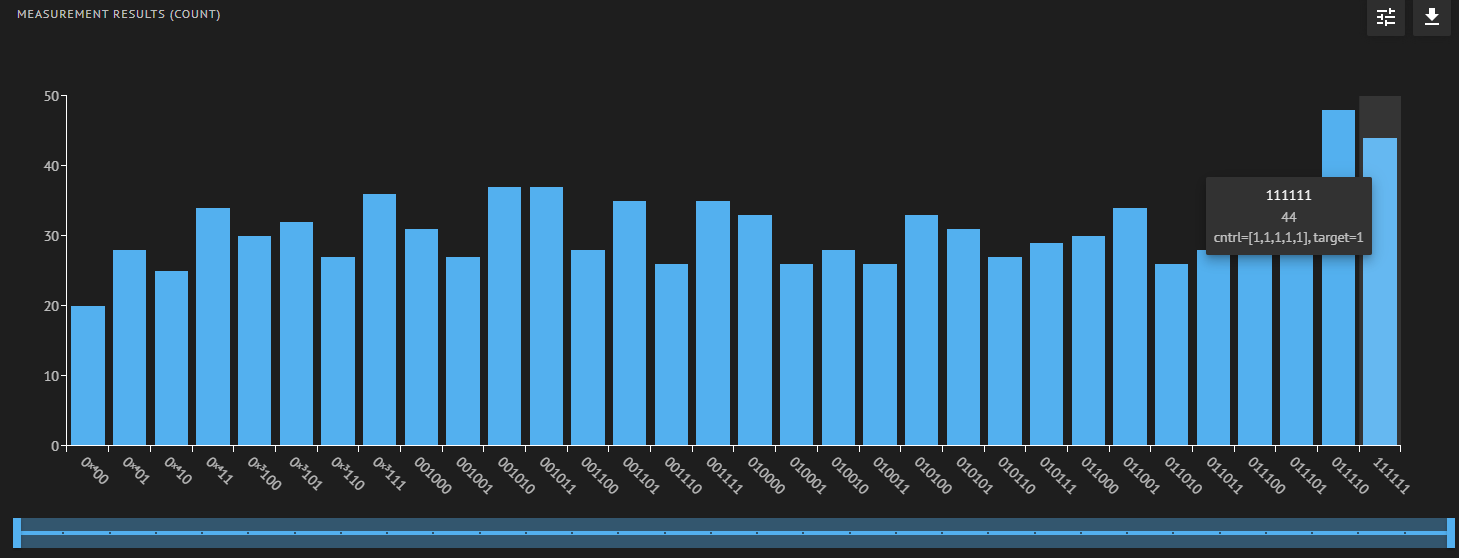

#### Print max depth

In [11]:
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The max circuit depth is {circuit_depth}")

The max circuit depth is 34


### Minimized Width

In [14]:
qmod_min_width = set_constraints(
    qmod, Constraints(optimization_parameter="width")
)

qprog = synthesize(qmod_min_width)
show(qprog)

Opening: https://platform.classiq.io/circuit/89433ce8-890f-4460-8e9e-59fc9d52eff9?version=0.62.0


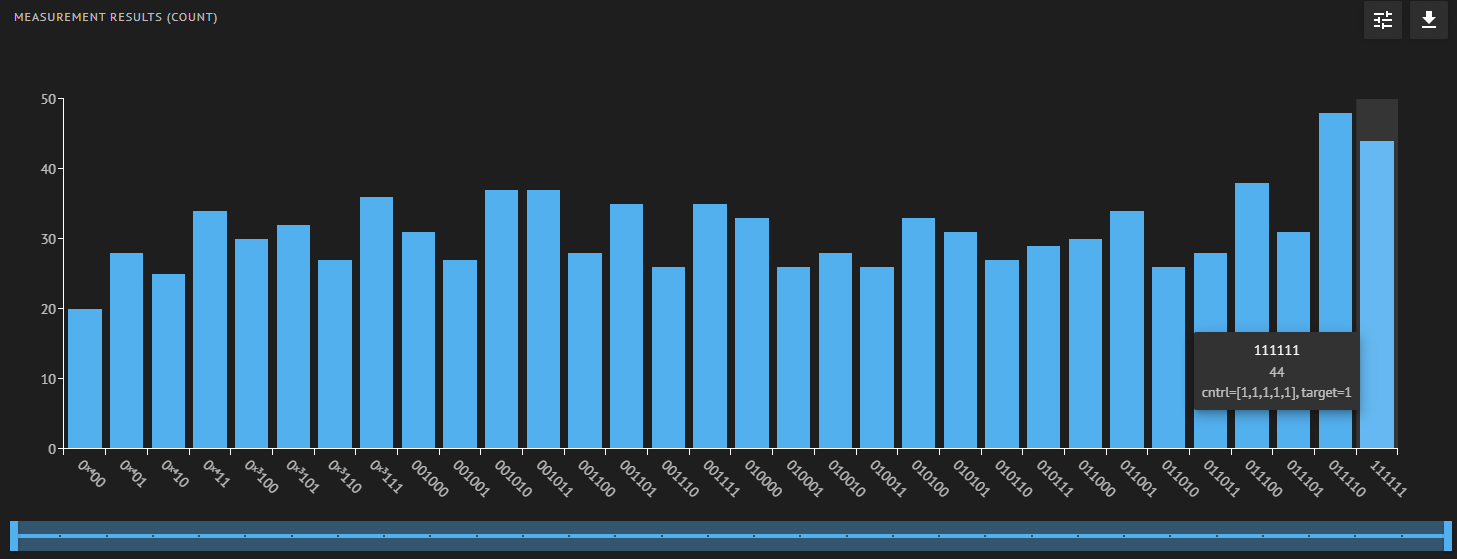

#### Print max width

In [15]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
print(f"The max circuit width is {circuit_width}")

The max circuit width is 6


### Somewhere in between

Previously we saw that the max depth is 34 and the max width is 6, so we will choose:

depth - 50

width - 10

In [ ]:
qmod_min_width = set_constraints(
    qmod, Constraints(max_width=10, max_depth=50)
)

qprog = synthesize(qmod_min_width)
show(qprog)

Opening: https://platform.classiq.io/circuit/6b6d827a-3751-4127-a83f-b1c2f6efd072?version=0.62.0


In [24]:
circuit_width = QuantumProgram.from_qprog(qprog).data.width
circuit_depth = QuantumProgram.from_qprog(qprog).transpiled_circuit.depth
print(f"The circuit width is {circuit_width} and the circuit depth is {circuit_depth}")

The circuit width is 8 and the circuit depth is 34
